In [1]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [2]:
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')
county21 = recent_census21.str.split(',').str[0]

county21

C:\Users\yhuan\AppData\Local\Temp/ipykernel_26012/1531365318.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')


0               Georgia
1        Appling County
2       Atkinson County
3          Bacon County
4          Baker County
             ...       
155    Whitfield County
156       Wilcox County
157       Wilkes County
158    Wilkinson County
159        Worth County
Name: Unnamed: 0, Length: 160, dtype: object

In [3]:
# 2021 data
data21 = recent_census[['2020','2021']]

census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

census_20

0      10725800
1         18428
2          8301
3         11123
4          2844
         ...   
155      102727
156        8731
157        9556
158        8844
159       20719
Name: 2020, Length: 160, dtype: int64

In [4]:
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

census_21

0      10799566
1         18488
2          8391
3         11079
4          2819
         ...   
155      102848
156        8739
157        9513
158        8831
159       20554
Name: 2021, Length: 160, dtype: int64

In [5]:
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

census21_df= organized_21.set_index("County")

census21_df

,2020,2021
County,,
Georgia,10725800,10799566
Appling County,18428,18488
Atkinson County,8301,8391
Bacon County,11123,11079
Baker County,2844,2819
...,...,...
Whitfield County,102727,102848
Wilcox County,8731,8739
Wilkes County,9556,9513


In [6]:
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# file_2_df
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
file_2_ga

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020
398,40,3,5,13,0,Georgia,Georgia,9687653,9688737,9712209,...,3.041427,3.798407,1.747055,4.060100,5.814395,7.200931,5.948622,5.638213,6.502924,4.765012
399,50,3,5,13,1,Georgia,Appling County,18236,18237,18337,...,3.098163,-9.988871,-4.843669,2.931914,-4.662637,-0.813824,-1.626457,4.109774,-8.340780,-2.941657
400,50,3,5,13,3,Georgia,Atkinson County,8375,8380,8363,...,-9.329028,-18.178535,-4.116970,-14.082797,7.737879,-11.188643,-7.009063,6.505632,-16.613495,8.402353
401,50,3,5,13,5,Georgia,Bacon County,11096,11097,11062,...,7.833603,-5.021971,0.089582,0.715820,1.071285,2.400747,-9.077964,-10.313901,-2.342976,-7.590133
402,50,3,5,13,7,Georgia,Baker County,3451,3447,3431,...,-38.267576,11.974255,-8.933889,-18.694407,-27.782065,-1.881763,-3.468390,-25.932448,-16.297262,-24.592888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,50,3,5,13,313,Georgia,Whitfield County,102599,102602,102740,...,-5.533701,-5.965944,-7.713370,-1.963739,-0.193555,1.134970,-7.072937,-4.851221,-1.439719,-7.111897
554,50,3,5,13,315,Georgia,Wilcox County,9255,9251,9313,...,-6.572922,-18.889556,1.324284,-14.569315,12.371823,-17.704073,-7.380493,4.213163,-21.390374,-8.299725
555,50,3,5,13,317,Georgia,Wilkes County,10593,10593,10389,...,-13.676706,-12.202923,-10.187775,4.424111,0.301705,-7.600709,9.859728,3.449500,-4.588559,-0.822073
556,50,3,5,13,319,Georgia,Wilkinson County,9563,9569,9528,...,-14.360382,7.303906,-11.569897,-8.581849,-19.495725,-3.425225,-5.674864,10.246130,-7.914832,-9.240478


In [7]:
# # trimming df to just populations and name
# ga_census_estimate_population = file_2_ga[["CTYNAME", "POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE2020"]]
# ga_census_estimate_population.reset_index()
# ga_census_estimate_population = ga_census_estimate_population.rename(columns={"POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", 
#                                              "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019", "POPESTIMATE2020": "2020"})
# ga_census_estimate_population

In [8]:
# this is Yi's 
# ga_census_estimate = file_2_ga[["CTYNAME", "POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE2020","NPOPCHG_2017","NPOPCHG_2018","NPOPCHG_2019","NPOPCHG_2020","NETMIG2017","NETMIG2018","NETMIG2019","NETMIG2020"]]
# ga_census_estimate.reset_index()


In [9]:
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})
ga_census_20 = ga_census_estimate_population.set_index("County")
ga_census_20

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047
...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769


In [10]:
years = ga_census_20.keys()

years


Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [11]:
# pick x numbers randomly
randomNumbers = []
i = 0
while i < 10:
    
    num = random.randint(1, 159)
    if num not in randomNumbers:
        randomNumbers.append(num)
        print(randomNumbers)
        i = i + 1

[36]
[36, 119]
[36, 119, 26]
[36, 119, 26, 141]
[36, 119, 26, 141, 81]
[36, 119, 26, 141, 81, 14]
[36, 119, 26, 141, 81, 14, 16]
[36, 119, 26, 141, 81, 14, 16, 78]
[36, 119, 26, 141, 81, 14, 16, 78, 52]
[36, 119, 26, 141, 81, 14, 16, 78, 52, 113]


In [12]:
# ga_census_estimate_population.iloc[86]

countyDataDictionary = {}

for x in randomNumbers:

    countyDataDictionary[x] = ga_census_20.iloc[x]
countyDataDictionary


{36: 2010    124951
 2011    128832
 2012    132601
 2013    136232
 2014    139223
 2015    143991
 2016    147622
 2017    151757
 2018    154399
 2019    157129
 Name: Columbia County, dtype: int64,
 119: 2010    16276
 2011    16257
 2012    16303
 2013    16184
 2014    16159
 2015    16224
 2016    16493
 2017    16560
 2018    16853
 2019    17116
 Name: Rabun County, dtype: int64,
 26: 2010    11185
 2011    11270
 2012    12293
 2013    12271
 2014    11738
 2015    11075
 2016    10065
 2017    10197
 2018    10548
 2019    10991
 Name: Chattahoochee County, dtype: int64,
 141: 2010    67060
 2011    67651
 2012    68324
 2013    68859
 2014    69341
 2015    69666
 2016    69990
 2017    70123
 2018    70091
 2019    70059
 Name: Troup County, dtype: int64,
 81: 2010    16872
 2011    16772
 2012    16351
 2013    16245
 2014    16127
 2015    15926
 2016    15773
 2017    15638
 2018    15423
 2019    15344
 Name: Jefferson County, dtype: int64,
 14: 2010    16246
 2011    

2010    124951
2011    128832
2012    132601
2013    136232
2014    139223
2015    143991
2016    147622
2017    151757
2018    154399
2019    157129
Name: Columbia County, dtype: int64
2010    16276
2011    16257
2012    16303
2013    16184
2014    16159
2015    16224
2016    16493
2017    16560
2018    16853
2019    17116
Name: Rabun County, dtype: int64
2010    11185
2011    11270
2012    12293
2013    12271
2014    11738
2015    11075
2016    10065
2017    10197
2018    10548
2019    10991
Name: Chattahoochee County, dtype: int64
2010    67060
2011    67651
2012    68324
2013    68859
2014    69341
2015    69666
2016    69990
2017    70123
2018    70091
2019    70059
Name: Troup County, dtype: int64
2010    16872
2011    16772
2012    16351
2013    16245
2014    16127
2015    15926
2016    15773
2017    15638
2018    15423
2019    15344
Name: Jefferson County, dtype: int64
2010    16246
2011    15982
2012    15616
2013    15648
2014    15524
2015    15672
2016    15732
2017    1564

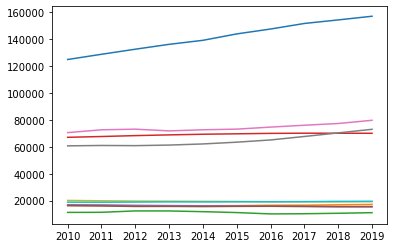

In [13]:
label=[]

for x in countyDataDictionary:
    print(countyDataDictionary[x])
    label.append(x)
    plt.plot(years, countyDataDictionary[x], label = label)
# plt.legend(handles=[x], loc="best")
# plt.yscale('log')
plt.show()

In [14]:
# # 2021 data
recent_census = data21[['2020','2021']]

census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

census_21

0      10799566
1         18488
2          8391
3         11079
4          2819
         ...   
155      102848
156        8739
157        9513
158        8831
159       20554
Name: 2021, Length: 160, dtype: int64

In [15]:
years2 = census21_df.keys()

years2

Index(['2020', '2021'], dtype='object')

In [16]:
# pick x numbers randomly
randomNumbers2 = []
i = 0
while i < 10:
    
    num2 = random.randint(1, 159)
    if num2 not in randomNumbers2:
        randomNumbers2.append(num2)
        print(randomNumbers2)
        i = i + 1

[153]
[153, 136]
[153, 136, 19]
[153, 136, 19, 67]
[153, 136, 19, 67, 47]
[153, 136, 19, 67, 47, 57]
[153, 136, 19, 67, 47, 57, 84]
[153, 136, 19, 67, 47, 57, 84, 61]
[153, 136, 19, 67, 47, 57, 84, 61, 137]
[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]


2020    7430
2021    7471
Name: Wheeler County, dtype: int64
2020    45766
2021    45842
Name: Thomas County, dtype: int64
2020    5560
2021    5509
Name: Calhoun County, dtype: int64
2020    957801
2021    964546
Name: Gwinnett County, dtype: int64
2020    85366
2021    84844
Name: Dougherty County, dtype: int64
2020    98593
2021    98771
Name: Floyd County, dtype: int64
2020    28356
2021    28400
Name: Jones County, dtype: int64
2020    31429
2021    32026
Name: Gilmer County, dtype: int64
2020    41348
2021    41212
Name: Tift County, dtype: int64
2020    7986
2021    7856
Name: Twiggs County, dtype: int64


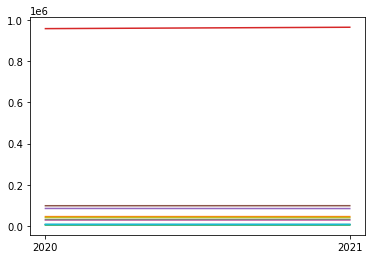

In [17]:
countyDataDictionary2 = {}

for x in randomNumbers2:

    countyDataDictionary2[x] = census21_df.iloc[x]        

for x in countyDataDictionary2:
    print(countyDataDictionary2[x])
    label.append(x)
    plt.plot(years2, countyDataDictionary2[x])
# plt.legend(handles=[x], loc="best")
# plt.yscale('log')
plt.show()

In [18]:
ga_census_20
census21_df


,2020,2021
County,,
Georgia,10725800,10799566
Appling County,18428,18488
Atkinson County,8301,8391
Bacon County,11123,11079
Baker County,2844,2819
...,...,...
Whitfield County,102727,102848
Wilcox County,8731,8739
Wilkes County,9556,9513


In [19]:
census21_df

,2020,2021
County,,
Georgia,10725800,10799566
Appling County,18428,18488
Atkinson County,8301,8391
Bacon County,11123,11079
Baker County,2844,2819
...,...,...
Whitfield County,102727,102848
Wilcox County,8731,8739
Wilkes County,9556,9513


In [32]:
# merge_census = ga_census_20.merge(census21_df,how ='left', on ='CTYNAME')

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')


column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

merge_census = merge_census_raw.reindex(columns=column_names)

merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


In [34]:
year_merge = merge_census.keys()

year_merge

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

In [35]:
# pick x numbers randomly
randomNumbers_merge = []
i = 0
while i < 10:
    
    num_merge = random.randint(1, 159)
    if num2 not in randomNumbers_merge:
        randomNumbers_merge.append(num_merge)
        print(randomNumbers2)
        i = i + 1

[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]
[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]
[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]
[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]
[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]
[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]
[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]
[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]
[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]
[153, 136, 19, 67, 47, 57, 84, 61, 137, 143]


2010    140414
2011    143557
2012    145630
2013    147352
2014    148429
2015    149197
2016    151287
2017    152757
2018    155004
2019    157427
2020    164242
2021    166829
Name: Houston County, dtype: int64
2010    85359
2011    85423
2012    85453
2013    86522
2014    87222
2015    88424
2016    88995
2017    89800
2018    90402
2019    90639
2020    93614
2021    94082
Name: Rockdale County, dtype: int64
2010    60706
2011    60985
2012    60860
2013    61286
2014    62125
2015    63439
2016    65091
2017    67681
2018    70347
2019    73015
2020    76712
2021    80286
Name: Jackson County, dtype: int64
2010    2512
2011    2454
2012    2407
2013    2368
2014    2287
2015    2277
2016    2323
2017    2334
2018    2254
2019    2300
2020    2224
2021    2243
Name: Quitman County, dtype: int64
2010    692536
2011    698496
2012    710783
2013    718026
2014    725247
2015    734846
2016    747299
2017    751680
2018    755514
2019    759932
2020    763831
2021    757718
Name: D

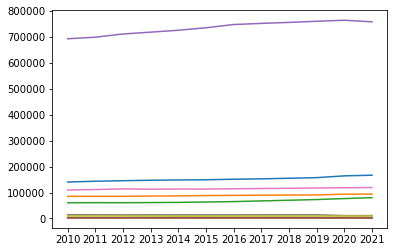

In [37]:
countyDataDictionary_merge = {}

for x in randomNumbers_merge:

    countyDataDictionary_merge[x] = merge_census.iloc[x]        

for x in countyDataDictionary_merge:
    print(countyDataDictionary_merge[x])
    plt.plot(year_merge, countyDataDictionary_merge[x])
# plt.legend(handles=[x], loc="best")
# plt.yscale('log')
plt.show()

In [21]:

# years = ga_census_estimate_population.keys()
# # Plot the unemployment values for a single country
# # country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014","2015",
# #                                                                   "2016","2017","2018","2019","2020"]], 
# #                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])


In [22]:
# country_one, = plt.plot(years, ga_census_estimate_population.loc['Liberty County',["2010","2011","2012","2013","2014","2015",
#                                                                   "2016","2017","2018","2019","2020"]], 
#                         color="green")

# plt.show()

In [23]:
# ga_census_estimate_population.loc[:,["2010","2011","2012","2013","2014","2015",
#                                                                   "2016","2017","2018","2019","2020"]]
# ga_census_estimate_population.loc["Georgia"]


# # transposed = ga_census_estimate_population.T
# # ax.plot(df_pop_density['Country'],
# #          df_pop_density['Area(100kmsq)'],
# #          marker='o', linewidth=2, label='Area')


# country_one, = plt.plot(years, ga_census_estimate_population.loc["Chatham County"], label="Chatham County")
# country_one, = plt.plot(years, ga_census_estimate_population.loc["Liberty County"], label="Liberty County")


# plt.xticks(rotation=90)
# plt.show()

In [24]:

# for x in countyDataDictionary.keys():
# #     print(countyDataDictionary[x])
#     plt.plot(years, countyDataDictionary[x])
    
# plt.xticks(rotation=90)    
# plt.show()
